In [36]:
gamestop = yf.Ticker('GME')

In [37]:
gme_data = gamestop.history(period='max')

In [38]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
#Importing python libraries 
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text

In [9]:
soup = BeautifulSoup(html_data , 'html5lib')

In [10]:
gamestop_revenue = []
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gamestop_revenue.append({"Date" :date , "Revenue" : revenue})
    
gme_revenue = pd.DataFrame(gamestop_revenue)


In [11]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].apply(lambda x: x.replace(',', '').replace('$', ''))

In [12]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [40]:
print(gme_revenue[-5:])

         Date Revenue
11 2009-01-01    8806
12 2008-01-01    7094
13 2007-01-01    5319
14 2006-01-01    3092
15 2005-01-01    1843


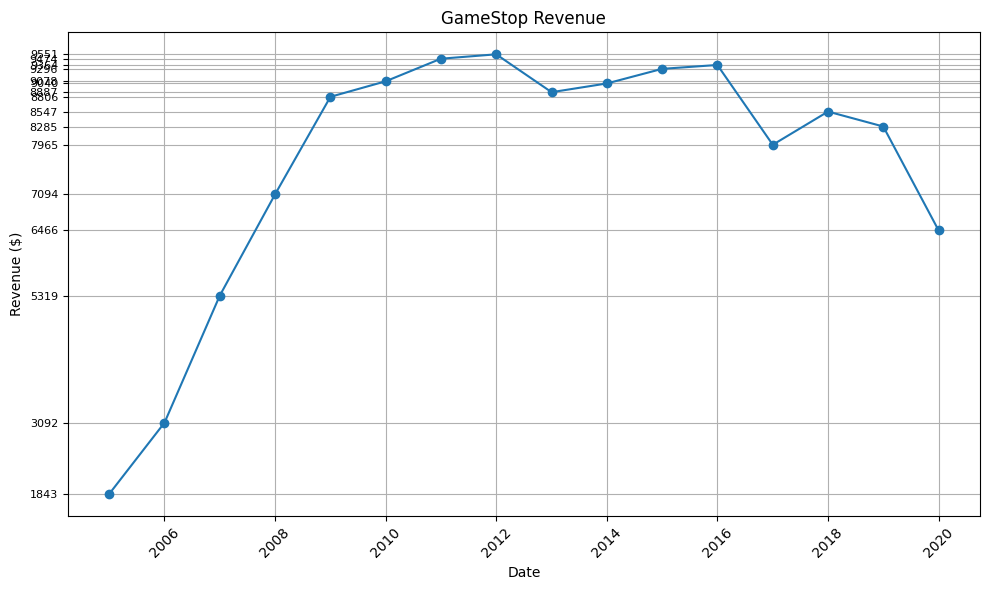

In [33]:
#Using Matplotlib because my nbformat was not working in that version
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(dataframe):
    dataframe_sorted = dataframe.sort_values(by='Date')
    
    dataframe_sorted['Revenue'] = pd.to_numeric(dataframe_sorted['Revenue'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe_sorted['Date'], dataframe_sorted['Revenue'], marker='o', linestyle='-')
    plt.title('GameStop Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.tick_params(axis='y', labelsize=8)
    
    plt.yticks(dataframe_sorted['Revenue'])
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

make_graph(gme_revenue)
